In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import geopandas
from scipy import stats
import seaborn as sns
import matplotlib.patches as mpl_patches

In [2]:
pd.options.display.max_columns = 100

In [3]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/Casey'

In [4]:
# Per species:
# Day ~ Temperature + (Temperature | Cell)

In [5]:
path = '/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients/'

os.chdir(path)

In [6]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [7]:
filename = 'coefficients_mean_arrival_day_temperature.csv'

df_coeffs_lmer = pd.read_csv(filename)
print(df_coeffs_lmer.shape)

df_coeffs_lmer.head(2)

(450, 4)


,species,cell,slope,intercept
0,Antrostomus_carolinensis,19,-1.749315,101.853281
1,Antrostomus_carolinensis,45,-0.959714,105.110310


In [8]:
df_coeffs_lmer = df_coeffs_lmer.rename(columns={'species': 'scientific_name'})

df_coeffs_lmer['scientific_name'] = df_coeffs_lmer['scientific_name'].str.replace('_', ' ')

print(df_coeffs_lmer.shape)

df_coeffs_lmer.head(2)

(450, 4)


,scientific_name,cell,slope,intercept
0,Antrostomus carolinensis,19,-1.749315,101.853281
1,Antrostomus carolinensis,45,-0.959714,105.110310


In [9]:
filename = 'betas_mean_arrival_day_temperature_cell.csv'

df_betas_lmer = pd.read_csv(filename)
print(df_betas_lmer.shape)

# df_betas_lmer.head(2)

(10, 9)


In [10]:
df_betas_lmer = df_betas_lmer.rename(columns={'species': 'scientific_name'})

df_betas_lmer['scientific_name'] = df_betas_lmer['scientific_name'].str.replace('_', ' ')

print(df_betas_lmer.shape)

df_betas_lmer

(10, 9)


,scientific_name,slope,standard_error,intercept,p_value,marginal_r_squared,conditional_r_squared,lower_conf_int,upper_conf_int
0,Antrostomus carolinensis,-0.415113,0.241744,111.826923,9.970722e-02,0.020078,0.955427,-0.961492,0.074303
1,Antrostomus vociferus,-0.173045,0.081062,113.686486,3.698928e-02,0.003261,0.973681,-0.365301,-0.006790
2,Chaetura pelagica,-0.116816,0.047037,115.279490,1.384118e-02,0.005496,0.944910,-0.223939,-0.017526
3,Chordeiles minor,0.056147,0.063216,126.749300,3.826664e-01,0.002582,0.951607,-0.100632,0.190169
4,Hirundo rustica,-0.312821,0.055085,106.184514,2.242378e-08,0.039749,0.912114,-0.444084,-0.191147
5,Petrochelidon pyrrhonota,-0.273856,0.070032,112.775683,3.787869e-04,0.025807,0.909035,-0.439466,-0.123855
6,Progne subis,0.074790,0.114209,101.414898,5.138940e-01,0.000607,0.926093,-0.184592,0.332799
7,Riparia riparia,-0.109394,0.096891,117.326417,2.706717e-01,0.005866,0.843460,-0.318042,0.090303
8,Stelgidopteryx serripennis,-0.502748,0.055070,99.498310,7.116308e-12,0.067197,0.958470,-0.624746,-0.390924
9,Tachycineta bicolor,-0.982234,0.060211,90.312681,1.073365e-47,0.139205,0.907697,-1.112587,-0.858051


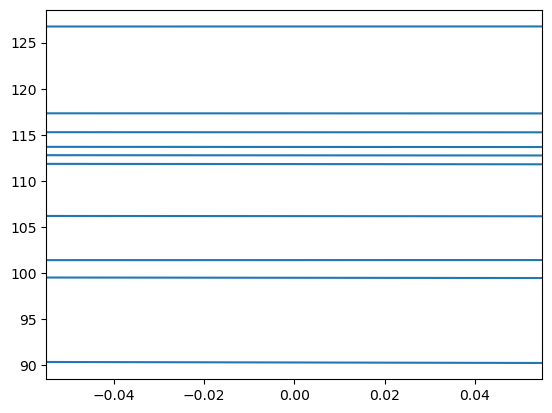

In [11]:
for i in range(len(df_betas_lmer)):
    
    slope = df_betas_lmer.iloc[i]['slope']
    
    intercept = df_betas_lmer.iloc[i]['intercept']
    
    plt.axline(xy1=(0, intercept), slope=slope)

In [12]:
plt.rcParams["figure.figsize"]

[6.4, 4.8]

In [13]:
# Per species:
# Day Anomaly ~ Temperature Anomaly

In [14]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [15]:
path = '/Users/alvastrand/Downloads/states_21basic/'

os.chdir(path)

In [16]:
os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [17]:
filename = 'aerial_insectivores_betas_day_anomaly_temp_anomaly_per_species.csv'

df_betas_ols_anomalies = pd.read_csv(filename)
print(df_betas_ols_anomalies.shape)

# df_betas_ols_anomalies.head(2)

(10, 8)


In [18]:
df_betas_ols_anomalies = df_betas_ols_anomalies.rename(columns={'slope': 'slope_anomalies', 
                                                                'standard_error': 'standard_error_anomalies', 
                                                                'intercept': 'intercept_anomalies', 
                                                                'p_value': 'p_value_anomalies', 
                                                                'r_squared': 'r_squared_anomalies', 
                                                                'lower_conf_int': 'lower_conf_int_anomalies', 
                                                                'upper_conf_int': 'upper_conf_int_anomalies'})

print(df_betas_ols_anomalies.shape)

df_betas_ols_anomalies

(10, 8)


,scientific_name,slope_anomalies,standard_error_anomalies,intercept_anomalies,p_value_anomalies,r_squared_anomalies,lower_conf_int_anomalies,upper_conf_int_anomalies
0,Antrostomus carolinensis,0.079411,0.178268,-0.001398,6.567288e-01,0.001524,-0.273270,0.432092
1,Antrostomus vociferus,-0.084139,0.071891,0.002150,2.435283e-01,0.008184,-0.226077,0.057799
2,Chaetura pelagica,0.027426,0.043137,0.000395,5.251069e-01,0.000511,-0.057251,0.112102
3,Chordeiles minor,0.246233,0.050702,-0.002914,2.069988e-06,0.083462,0.146392,0.346075
4,Hirundo rustica,-0.121068,0.054453,-0.000911,2.647992e-02,0.006354,-0.227961,-0.014175
5,Petrochelidon pyrrhonota,-0.136671,0.064112,-0.003796,3.377846e-02,0.013832,-0.262798,-0.010543
6,Progne subis,0.148223,0.105817,-0.001023,1.624865e-01,0.007519,-0.060148,0.356595
7,Riparia riparia,-0.027070,0.069252,-0.001080,6.962393e-01,0.000667,-0.163522,0.109382
8,Stelgidopteryx serripennis,-0.339194,0.040925,0.005062,6.046284e-16,0.091024,-0.419547,-0.258841
9,Tachycineta bicolor,-0.893414,0.058222,0.013433,1.598823e-45,0.267740,-1.007742,-0.779087


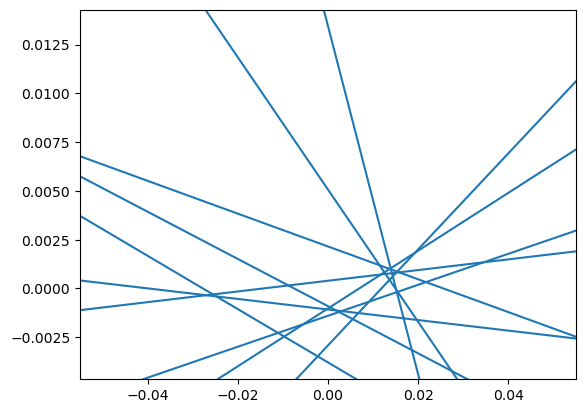

In [19]:
for i in range(len(df_betas_ols_anomalies)):
    
    slope = df_betas_ols_anomalies.iloc[i]['slope_anomalies']
    
    intercept = df_betas_ols_anomalies.iloc[i]['intercept_anomalies']
    
    plt.axline(xy1=(0, intercept), slope=slope)

In [20]:
# Per species:
# Day Anomaly ~ Temperature Anomaly + (Temperature Anomaly | Cell)

In [21]:
path = '/Users/alvastrand/Downloads/linear_mixed_modeling/day_anomaly_temperature_anomaly/coefficients/'

os.chdir(path)

In [22]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/day_anomaly_temperature_anomaly/coefficients'

In [23]:
filename = 'coefficients_day_anomaly_temperature_anomaly.csv'

df_coeffs_lmer_anomalies = pd.read_csv(filename)
print(df_coeffs_lmer_anomalies.shape)

df_coeffs_lmer_anomalies.head(2)

(450, 4)


,species,cell,slope,intercept
0,Antrostomus_carolinensis,19,-1.878261,0.003224
1,Antrostomus_carolinensis,45,-0.274535,0.003224


In [24]:
df_coeffs_lmer_anomalies = df_coeffs_lmer_anomalies.rename(columns={'species': 'scientific_name'})

df_coeffs_lmer_anomalies['scientific_name'] = df_coeffs_lmer_anomalies['scientific_name'].str.replace('_', ' ')

print(df_coeffs_lmer_anomalies.shape)

df_coeffs_lmer_anomalies.head(2)

(450, 4)


,scientific_name,cell,slope,intercept
0,Antrostomus carolinensis,19,-1.878261,0.003224
1,Antrostomus carolinensis,45,-0.274535,0.003224


In [25]:
filename = 'betas_day_anomaly_temperature_anomaly_cell.csv'

df_betas_lmer_anomalies = pd.read_csv(filename)
print(df_betas_lmer_anomalies.shape)

# df_betas_lmer_anomalies.head(2)

(10, 7)


In [26]:
df_betas_lmer_anomalies = df_betas_lmer_anomalies.rename(columns={'species': 'scientific_name'})

df_betas_lmer_anomalies = df_betas_lmer_anomalies.rename(columns={'slope': 'slope_anomalies_lmer', 
                                                                  'standard_error': 'standard_error_anomalies_lmer', 
                                                                  'intercept': 'intercept_anomalies_lmer', 
                                                                  'p_value': 'p_value_anomalies_lmer', 
                                                                  'marginal_r_squared': 'marginal_r_squared_anomalies_lmer', 
                                                                  'conditional_r_squared': 'conditional_r_squared_anomalies_lmer'})

df_betas_lmer_anomalies['scientific_name'] = df_betas_lmer_anomalies['scientific_name'].str.replace('_', ' ')

print(df_betas_lmer_anomalies.shape)

df_betas_lmer_anomalies

(10, 7)


,scientific_name,slope_anomalies_lmer,standard_error_anomalies_lmer,intercept_anomalies_lmer,p_value_anomalies_lmer,marginal_r_squared_anomalies_lmer,conditional_r_squared_anomalies_lmer
0,Antrostomus carolinensis,-0.149532,0.261551,0.003224,5.734644e-01,5.383268e-03,0.181979
1,Antrostomus vociferus,-0.084139,0.071891,0.002150,2.435283e-01,8.135508e-03,0.008136
2,Chaetura pelagica,0.027426,0.043137,0.000395,5.251069e-01,5.101058e-04,0.000510
3,Chordeiles minor,0.245894,0.052073,-0.002464,6.376809e-05,8.294372e-02,0.088423
4,Hirundo rustica,-0.121068,0.054453,-0.000911,2.647992e-02,6.346198e-03,0.006346
5,Petrochelidon pyrrhonota,-0.139023,0.067054,-0.001591,4.496468e-02,1.425947e-02,0.024705
6,Progne subis,0.148223,0.105817,-0.001023,1.624865e-01,7.489992e-03,0.007490
7,Riparia riparia,-0.000993,0.091359,0.000444,9.914177e-01,8.892154e-07,0.090253
8,Stelgidopteryx serripennis,-0.379444,0.050245,0.006564,7.911664e-09,1.108001e-01,0.146599
9,Tachycineta bicolor,-0.893414,0.058222,0.013433,1.598823e-45,2.674363e-01,0.267436


In [27]:
# Day ~ Temperature + (Temperature | Cell) versus Day Anomaly ~ Temperature Anomaly

df_output_anomalies_comparison = df_betas_lmer.merge(df_betas_ols_anomalies, on='scientific_name')
print(df_output_anomalies_comparison.shape)

df_output_anomalies_comparison

(10, 16)


,scientific_name,slope,standard_error,intercept,p_value,marginal_r_squared,conditional_r_squared,lower_conf_int,upper_conf_int,slope_anomalies,standard_error_anomalies,intercept_anomalies,p_value_anomalies,r_squared_anomalies,lower_conf_int_anomalies,upper_conf_int_anomalies
0,Antrostomus carolinensis,-0.415113,0.241744,111.826923,9.970722e-02,0.020078,0.955427,-0.961492,0.074303,0.079411,0.178268,-0.001398,6.567288e-01,0.001524,-0.273270,0.432092
1,Antrostomus vociferus,-0.173045,0.081062,113.686486,3.698928e-02,0.003261,0.973681,-0.365301,-0.006790,-0.084139,0.071891,0.002150,2.435283e-01,0.008184,-0.226077,0.057799
2,Chaetura pelagica,-0.116816,0.047037,115.279490,1.384118e-02,0.005496,0.944910,-0.223939,-0.017526,0.027426,0.043137,0.000395,5.251069e-01,0.000511,-0.057251,0.112102
3,Chordeiles minor,0.056147,0.063216,126.749300,3.826664e-01,0.002582,0.951607,-0.100632,0.190169,0.246233,0.050702,-0.002914,2.069988e-06,0.083462,0.146392,0.346075
4,Hirundo rustica,-0.312821,0.055085,106.184514,2.242378e-08,0.039749,0.912114,-0.444084,-0.191147,-0.121068,0.054453,-0.000911,2.647992e-02,0.006354,-0.227961,-0.014175
5,Petrochelidon pyrrhonota,-0.273856,0.070032,112.775683,3.787869e-04,0.025807,0.909035,-0.439466,-0.123855,-0.136671,0.064112,-0.003796,3.377846e-02,0.013832,-0.262798,-0.010543
6,Progne subis,0.074790,0.114209,101.414898,5.138940e-01,0.000607,0.926093,-0.184592,0.332799,0.148223,0.105817,-0.001023,1.624865e-01,0.007519,-0.060148,0.356595
7,Riparia riparia,-0.109394,0.096891,117.326417,2.706717e-01,0.005866,0.843460,-0.318042,0.090303,-0.027070,0.069252,-0.001080,6.962393e-01,0.000667,-0.163522,0.109382
8,Stelgidopteryx serripennis,-0.502748,0.055070,99.498310,7.116308e-12,0.067197,0.958470,-0.624746,-0.390924,-0.339194,0.040925,0.005062,6.046284e-16,0.091024,-0.419547,-0.258841
9,Tachycineta bicolor,-0.982234,0.060211,90.312681,1.073365e-47,0.139205,0.907697,-1.112587,-0.858051,-0.893414,0.058222,0.013433,1.598823e-45,0.267740,-1.007742,-0.779087


-1.0350857000217726
0.3032156428233258


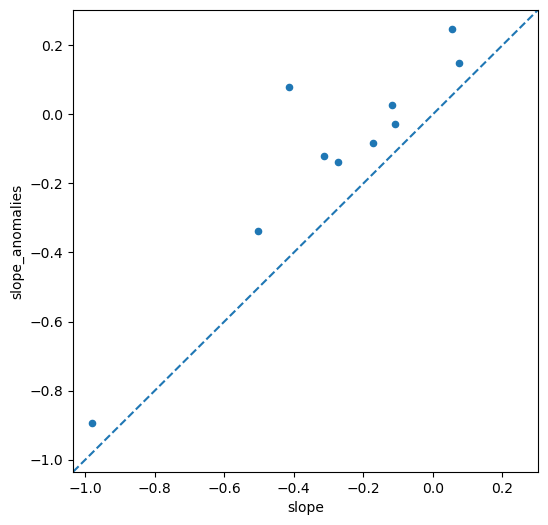

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))

df_output_anomalies_comparison.plot.scatter(x='slope', y='slope_anomalies', ax=ax)

low_x, high_x = ax.get_xlim()
# print(low_x, high_x)

low_y, high_y = ax.get_ylim()
# print(low_y, high_y)

low = min(low_x, low_y)
print(low)

high = max(high_x, high_y)
print(high)

ax.set_xlim(low, high)
ax.set_ylim(low, high)

ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

plt.show()

-0.004657471875804745
128.571130695703


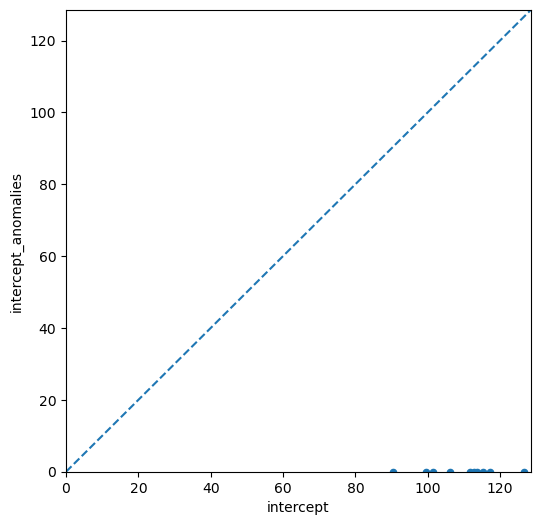

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))

df_output_anomalies_comparison.plot.scatter(x='intercept', y='intercept_anomalies', ax=ax)

low_x, high_x = ax.get_xlim()
# print(low_x, high_x)

low_y, high_y = ax.get_ylim()
# print(low_y, high_y)

low = min(low_x, low_y)
print(low)

high = max(high_x, high_y)
print(high)

ax.set_xlim(low, high)
ax.set_ylim(low, high)

ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

plt.show()

In [30]:
# Day ~ Temperature + (Temperature | Cell) versus Day Anomaly ~ Temperature Anomaly + (Temperature Anomaly | Cell)

df_output_anomalies_comparison = df_betas_lmer_anomalies.merge(df_betas_ols_anomalies, on='scientific_name')
print(df_output_anomalies_comparison.shape)

df_output_anomalies_comparison

(10, 14)


,scientific_name,slope_anomalies_lmer,standard_error_anomalies_lmer,intercept_anomalies_lmer,p_value_anomalies_lmer,marginal_r_squared_anomalies_lmer,conditional_r_squared_anomalies_lmer,slope_anomalies,standard_error_anomalies,intercept_anomalies,p_value_anomalies,r_squared_anomalies,lower_conf_int_anomalies,upper_conf_int_anomalies
0,Antrostomus carolinensis,-0.149532,0.261551,0.003224,5.734644e-01,5.383268e-03,0.181979,0.079411,0.178268,-0.001398,6.567288e-01,0.001524,-0.273270,0.432092
1,Antrostomus vociferus,-0.084139,0.071891,0.002150,2.435283e-01,8.135508e-03,0.008136,-0.084139,0.071891,0.002150,2.435283e-01,0.008184,-0.226077,0.057799
2,Chaetura pelagica,0.027426,0.043137,0.000395,5.251069e-01,5.101058e-04,0.000510,0.027426,0.043137,0.000395,5.251069e-01,0.000511,-0.057251,0.112102
3,Chordeiles minor,0.245894,0.052073,-0.002464,6.376809e-05,8.294372e-02,0.088423,0.246233,0.050702,-0.002914,2.069988e-06,0.083462,0.146392,0.346075
4,Hirundo rustica,-0.121068,0.054453,-0.000911,2.647992e-02,6.346198e-03,0.006346,-0.121068,0.054453,-0.000911,2.647992e-02,0.006354,-0.227961,-0.014175
5,Petrochelidon pyrrhonota,-0.139023,0.067054,-0.001591,4.496468e-02,1.425947e-02,0.024705,-0.136671,0.064112,-0.003796,3.377846e-02,0.013832,-0.262798,-0.010543
6,Progne subis,0.148223,0.105817,-0.001023,1.624865e-01,7.489992e-03,0.007490,0.148223,0.105817,-0.001023,1.624865e-01,0.007519,-0.060148,0.356595
7,Riparia riparia,-0.000993,0.091359,0.000444,9.914177e-01,8.892154e-07,0.090253,-0.027070,0.069252,-0.001080,6.962393e-01,0.000667,-0.163522,0.109382
8,Stelgidopteryx serripennis,-0.379444,0.050245,0.006564,7.911664e-09,1.108001e-01,0.146599,-0.339194,0.040925,0.005062,6.046284e-16,0.091024,-0.419547,-0.258841
9,Tachycineta bicolor,-0.893414,0.058222,0.013433,1.598823e-45,2.674363e-01,0.267436,-0.893414,0.058222,0.013433,1.598823e-45,0.267740,-1.007742,-0.779087


-0.9503964302443053
0.3032156428233258


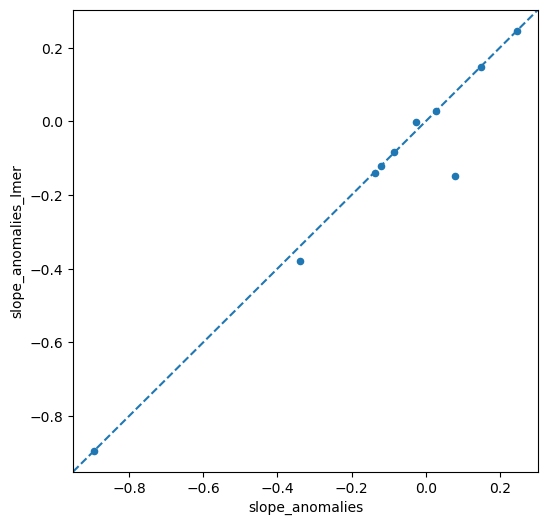

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))

df_output_anomalies_comparison.plot.scatter(x='slope_anomalies', y='slope_anomalies_lmer', ax=ax)

low_x, high_x = ax.get_xlim()
# print(low_x, high_x)

low_y, high_y = ax.get_ylim()
# print(low_y, high_y)

low = min(low_x, low_y)
print(low)

high = max(high_x, high_y)
print(high)

ax.set_xlim(low, high)
ax.set_ylim(low, high)

ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

plt.show()

-0.004657471875804745
0.014294457681020245


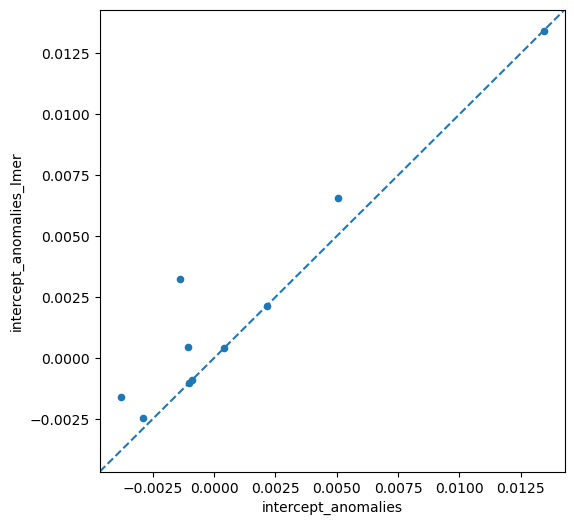

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))

df_output_anomalies_comparison.plot.scatter(x='intercept_anomalies', y='intercept_anomalies_lmer', ax=ax)

low_x, high_x = ax.get_xlim()
# print(low_x, high_x)

low_y, high_y = ax.get_ylim()
# print(low_y, high_y)

low = min(low_x, low_y)
print(low)

high = max(high_x, high_y)
print(high)

ax.set_xlim(low, high)
ax.set_ylim(low, high)

ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

plt.show()

In [33]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/day_anomaly_temperature_anomaly/coefficients'

In [34]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [35]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [36]:
filename = 'aerial_insectivores_speeds_mean_arrival_days.csv'

df_speeds_means = pd.read_csv(filename)
print(df_speeds_means.shape)

df_speeds_means.head(2)

(10, 3)


,scientific_name,beta_gamma_mean,mean_arrival_day
0,Hirundo rustica,2.053789,105.614979
1,Chordeiles minor,1.363545,125.892520


In [37]:
filename = 'aerial_insectivores_migration_distances_mean_weighted_body_masses.csv'

df_masses_dist = pd.read_csv(filename)
print(df_masses_dist.shape)

df_masses_dist.head(2)

(19, 26)


,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america,body_mass
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,32.1
1,Antrostomus carolinensis,-88.058904,34.063816,-83.140011,16.459749,30.354784,2011.374172,0.049623,718,8D3E887123F5C670,species,Chuck-will's-widow,Engoulevent de Caroline,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,Monotypic.,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,109.0


In [38]:
df_masses_dist = df_masses_dist[['scientific_name', 'common_name', 'body_mass', 'distance']]
print(df_masses_dist.shape)

df_masses_dist.head(2)

(19, 4)


,scientific_name,common_name,body_mass,distance
0,Aeronautes saxatalis,White-throated Swift,32.1,736.046352
1,Antrostomus carolinensis,Chuck-will's-widow,109.0,2011.374172


In [39]:
df_masses_dist_speeds_means = df_masses_dist.merge(df_speeds_means, on='scientific_name')
print(df_masses_dist_speeds_means.shape)

df_masses_dist_speeds_means.head(2)

(10, 6)


,scientific_name,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day
0,Antrostomus carolinensis,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908
1,Antrostomus vociferus,Eastern Whip-poor-will,53.4,2656.170598,3.464462,114.550493


In [40]:
list(df_masses_dist_speeds_means['common_name'])

["Chuck-will's-widow",
 'Eastern Whip-poor-will',
 'Chimney Swift',
 'Common Nighthawk',
 'Barn Swallow',
 'Cliff Swallow',
 'Purple Martin',
 'Bank Swallow',
 'Northern Rough-winged Swallow',
 'Tree Swallow']

In [41]:
list_species_codes = ['CWWI', 'EWPW', 'CHSW', 'CONI', 'BARS', 'CLSW', 'PUMA', 'BANS', 'NRWS', 'TRES']
print(len(list_species_codes))

10


In [42]:
df_masses_dist_speeds_means['species_code'] = list_species_codes
print(df_masses_dist_speeds_means.shape)

df_masses_dist_speeds_means.head(2)

(10, 7)


,scientific_name,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,Antrostomus carolinensis,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,Antrostomus vociferus,Eastern Whip-poor-will,53.4,2656.170598,3.464462,114.550493,EWPW


In [43]:
df_coeffs_lmer_traits = df_coeffs_lmer.merge(df_masses_dist_speeds_means, on='scientific_name')

# df_coeffs_lmer_traits['body_mass_mg'] = df_coeffs_lmer_traits['body_mass']*1000

# df_coeffs_lmer_traits['log_body_mass_mg'] = np.log(df_coeffs_lmer_traits['body_mass_mg'])

print(df_coeffs_lmer_traits.shape)

df_coeffs_lmer_traits.head(2)

(450, 10)


,scientific_name,cell,slope,intercept,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,Antrostomus carolinensis,19,-1.749315,101.853281,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,Antrostomus carolinensis,45,-0.959714,105.110310,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI


In [44]:
df_betas_lmer_traits = df_betas_lmer.merge(df_masses_dist_speeds_means, on='scientific_name')
print(df_betas_lmer_traits.shape)

df_betas_lmer_traits.head(2)

(10, 15)


,scientific_name,slope,standard_error,intercept,p_value,marginal_r_squared,conditional_r_squared,lower_conf_int,upper_conf_int,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,Antrostomus carolinensis,-0.415113,0.241744,111.826923,0.099707,0.020078,0.955427,-0.961492,0.074303,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,Antrostomus vociferus,-0.173045,0.081062,113.686486,0.036989,0.003261,0.973681,-0.365301,-0.006790,Eastern Whip-poor-will,53.4,2656.170598,3.464462,114.550493,EWPW


In [45]:
df_betas_lmer_traits = df_betas_lmer_traits.sort_values(by='common_name')
print(df_betas_lmer_traits.shape)

df_betas_lmer_traits

(10, 15)


,scientific_name,slope,standard_error,intercept,p_value,marginal_r_squared,conditional_r_squared,lower_conf_int,upper_conf_int,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
7,Riparia riparia,-0.109394,0.096891,117.326417,2.706717e-01,0.005866,0.843460,-0.318042,0.090303,Bank Swallow,13.273347,8056.133802,1.417866,117.883515,BANS
4,Hirundo rustica,-0.312821,0.055085,106.184514,2.242378e-08,0.039749,0.912114,-0.444084,-0.191147,Barn Swallow,17.282981,7363.729821,2.053789,105.614979,BARS
2,Chaetura pelagica,-0.116816,0.047037,115.279490,1.384118e-02,0.005496,0.944910,-0.223939,-0.017526,Chimney Swift,23.600000,5124.885184,1.776108,114.550761,CHSW
0,Antrostomus carolinensis,-0.415113,0.241744,111.826923,9.970722e-02,0.020078,0.955427,-0.961492,0.074303,Chuck-will's-widow,109.000000,2011.374172,3.501294,108.002908,CWWI
5,Petrochelidon pyrrhonota,-0.273856,0.070032,112.775683,3.787869e-04,0.025807,0.909035,-0.439466,-0.123855,Cliff Swallow,21.600000,8972.354593,2.057220,113.127737,CLSW
3,Chordeiles minor,0.056147,0.063216,126.749300,3.826664e-01,0.002582,0.951607,-0.100632,0.190169,Common Nighthawk,79.300000,7111.696950,1.363545,125.892520,CONI
1,Antrostomus vociferus,-0.173045,0.081062,113.686486,3.698928e-02,0.003261,0.973681,-0.365301,-0.006790,Eastern Whip-poor-will,53.400000,2656.170598,3.464462,114.550493,EWPW
8,Stelgidopteryx serripennis,-0.502748,0.055070,99.498310,7.116308e-12,0.067197,0.958470,-0.624746,-0.390924,Northern Rough-winged Swallow,15.854717,2067.633734,2.368514,98.495535,NRWS
6,Progne subis,0.074790,0.114209,101.414898,5.138940e-01,0.000607,0.926093,-0.184592,0.332799,Purple Martin,53.814439,7924.070970,2.596541,101.590975,PUMA
9,Tachycineta bicolor,-0.982234,0.060211,90.312681,1.073365e-47,0.139205,0.907697,-1.112587,-0.858051,Tree Swallow,21.200000,3201.426202,3.254917,92.752122,TRES


In [46]:
df_betas_lmer_traits['code_common_name'] = df_betas_lmer_traits['species_code'] + ' (' + df_betas_lmer_traits['common_name'] + ')' 
print(df_betas_lmer_traits.shape)

df_betas_lmer_traits

(10, 16)


,scientific_name,slope,standard_error,intercept,p_value,marginal_r_squared,conditional_r_squared,lower_conf_int,upper_conf_int,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code,code_common_name
7,Riparia riparia,-0.109394,0.096891,117.326417,2.706717e-01,0.005866,0.843460,-0.318042,0.090303,Bank Swallow,13.273347,8056.133802,1.417866,117.883515,BANS,BANS (Bank Swallow)
4,Hirundo rustica,-0.312821,0.055085,106.184514,2.242378e-08,0.039749,0.912114,-0.444084,-0.191147,Barn Swallow,17.282981,7363.729821,2.053789,105.614979,BARS,BARS (Barn Swallow)
2,Chaetura pelagica,-0.116816,0.047037,115.279490,1.384118e-02,0.005496,0.944910,-0.223939,-0.017526,Chimney Swift,23.600000,5124.885184,1.776108,114.550761,CHSW,CHSW (Chimney Swift)
0,Antrostomus carolinensis,-0.415113,0.241744,111.826923,9.970722e-02,0.020078,0.955427,-0.961492,0.074303,Chuck-will's-widow,109.000000,2011.374172,3.501294,108.002908,CWWI,CWWI (Chuck-will's-widow)
5,Petrochelidon pyrrhonota,-0.273856,0.070032,112.775683,3.787869e-04,0.025807,0.909035,-0.439466,-0.123855,Cliff Swallow,21.600000,8972.354593,2.057220,113.127737,CLSW,CLSW (Cliff Swallow)
3,Chordeiles minor,0.056147,0.063216,126.749300,3.826664e-01,0.002582,0.951607,-0.100632,0.190169,Common Nighthawk,79.300000,7111.696950,1.363545,125.892520,CONI,CONI (Common Nighthawk)
1,Antrostomus vociferus,-0.173045,0.081062,113.686486,3.698928e-02,0.003261,0.973681,-0.365301,-0.006790,Eastern Whip-poor-will,53.400000,2656.170598,3.464462,114.550493,EWPW,EWPW (Eastern Whip-poor-will)
8,Stelgidopteryx serripennis,-0.502748,0.055070,99.498310,7.116308e-12,0.067197,0.958470,-0.624746,-0.390924,Northern Rough-winged Swallow,15.854717,2067.633734,2.368514,98.495535,NRWS,NRWS (Northern Rough-winged Swallow)
6,Progne subis,0.074790,0.114209,101.414898,5.138940e-01,0.000607,0.926093,-0.184592,0.332799,Purple Martin,53.814439,7924.070970,2.596541,101.590975,PUMA,PUMA (Purple Martin)
9,Tachycineta bicolor,-0.982234,0.060211,90.312681,1.073365e-47,0.139205,0.907697,-1.112587,-0.858051,Tree Swallow,21.200000,3201.426202,3.254917,92.752122,TRES,TRES (Tree Swallow)


In [64]:
# Test for phylogenetic signal

# Prepare data

os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [65]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/Manuscripts./Sensitivity Manuscript./data/'

os.chdir(path)

In [66]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/Manuscripts./Sensitivity Manuscript./data'

In [68]:
df_betas_lmer_traits_test = df_betas_lmer_traits.copy()

df_betas_lmer_traits_test['scientific_name'] = df_betas_lmer_traits_test['scientific_name'].str.replace(' ', '_')

print(df_betas_lmer_traits_test.shape)

df_betas_lmer_traits_test.head(2)

(10, 16)


,scientific_name,slope,standard_error,intercept,p_value,marginal_r_squared,conditional_r_squared,lower_conf_int,upper_conf_int,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code,code_common_name
7,Riparia_riparia,-0.109394,0.096891,117.326417,2.706717e-01,0.005866,0.843460,-0.318042,0.090303,Bank Swallow,13.273347,8056.133802,1.417866,117.883515,BANS,BANS (Bank Swallow)
4,Hirundo_rustica,-0.312821,0.055085,106.184514,2.242378e-08,0.039749,0.912114,-0.444084,-0.191147,Barn Swallow,17.282981,7363.729821,2.053789,105.614979,BARS,BARS (Barn Swallow)


In [69]:
df_betas_lmer_traits_test.to_csv('betas_lmer_traits.csv', index=False)

In [47]:
df_betas_ols_anomalies_traits = df_betas_ols_anomalies.merge(df_masses_dist_speeds_means, on='scientific_name')
print(df_betas_ols_anomalies_traits.shape)

df_betas_ols_anomalies_traits.head(2)

(10, 14)


,scientific_name,slope_anomalies,standard_error_anomalies,intercept_anomalies,p_value_anomalies,r_squared_anomalies,lower_conf_int_anomalies,upper_conf_int_anomalies,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code
0,Antrostomus carolinensis,0.079411,0.178268,-0.001398,0.656729,0.001524,-0.273270,0.432092,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI
1,Antrostomus vociferus,-0.084139,0.071891,0.002150,0.243528,0.008184,-0.226077,0.057799,Eastern Whip-poor-will,53.4,2656.170598,3.464462,114.550493,EWPW


In [48]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [49]:
path = '/Users/alvastrand/Downloads/states_21basic/'

os.chdir(path)

In [50]:
os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [51]:
filename = 'aerial_insectivores_mean_arrival_days_prepared.csv'

df_lat = pd.read_csv(filename)
print(df_lat.shape)

df_lat.head(2)

(4281, 19)


,species,cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,VALID_GAM,arr_IAR_mean,arr_IAR_sd,sigma_beta0_mean,sigma_beta0_sd,beta_gamma_mean,beta_gamma_sd,plmax,num_diverge,max_Rhat,min_neff,air_temp_degrees_celsius
0,Hirundo_rustica,5,24,-82,2010,88.097333,8.149519,True,83.163503,3.758457,2.85316,0.633302,2.053789,0.098024,0.997,0,1.0,945,17.591547
1,Hirundo_rustica,5,24,-82,2012,84.357667,13.455486,True,82.674423,3.737352,2.85316,0.633302,2.053789,0.098024,1.000,0,1.0,945,20.578819


In [52]:
df_lat = df_lat[['cell', 'lat', 'lon']].drop_duplicates()
print(df_lat.shape)

df_lat.head(2)

(82, 3)


,cell,lat,lon
0,5,24,-82
8,19,26,-82


In [53]:
df_coeffs_lmer_traits = df_coeffs_lmer_traits.merge(df_lat, on='cell')
print(df_coeffs_lmer_traits.shape)

df_coeffs_lmer_traits.head(2)

(450, 12)


,scientific_name,cell,slope,intercept,common_name,body_mass,distance,beta_gamma_mean,mean_arrival_day,species_code,lat,lon
0,Antrostomus carolinensis,19,-1.749315,101.853281,Chuck-will's-widow,109.0,2011.374172,3.501294,108.002908,CWWI,26,-82
1,Chaetura pelagica,19,-0.277597,107.545694,Chimney Swift,23.6,5124.885184,1.776108,114.550761,CHSW,26,-82


In [54]:
# Linear mixed modeling

# Prepare data

os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [55]:
path = '/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients/'

os.chdir(path)

In [56]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [57]:
# df_coeffs_lmer_traits.to_csv('traits_coefficients_mean_arrival_day_temperature.csv', index=False)

In [78]:
def run_ols_regression(df, predictor_variable, column_name, column_name_lower_conf_int, column_name_upper_conf_int, remove):

    model_ols = smf.ols(formula=column_name + ' ~ ' + predictor_variable, data=df)

    res_ols = model_ols.fit()

    print(res_ols.summary())
    
    slope = res_ols.params[1]
#     print(slope)

    standard_error = res_ols.bse.iloc[1]
    
    intercept = res_ols.params[0]
#     print(intercept)

    r_squared = res_ols.rsquared
#     print(r_squared)

    p_value = res_ols.pvalues[1]
#     print(p_value)
    
    resid = res_ols.resid
#     print(resid)
    
    df_resid = resid.to_frame().reset_index()
    print(df_resid.shape)
    
    print(df_resid.head(2))
    
    df_resid = df_resid.drop('index', axis=1)
    print(df_resid.shape)
    
    print(df_resid.head(2))
    
    df_resid = df_resid.rename(columns={0: 'residual'})
    print(df_resid.shape)
    
    print(df_resid.head(2))
    
    # Test for phylogenetic signal
    
    if remove == False:
    
        print(os.getcwd())

        df_resid.to_csv('residuals_sensitivity_' + predictor_variable + '.csv', index=False)

#     fig, ax = plt.subplots()

    g = sns.lmplot(data=df, x=predictor_variable, y=column_name, hue='code_common_name', fit_reg=False, 
                    palette='colorblind', height=4.76, aspect=1.5)
    
    g._legend.set_title('Code (Common name)')
    
    plt.setp(g._legend.get_title(), fontsize=18)

    sns.move_legend(g, 'center right', bbox_to_anchor=(1.2, 0.5), fontsize=16, alignment='left')
    
    if remove == False:

        g.tick_params(labelsize=16)
    
    if remove == True:
    
        g.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False, labelsize=16)
            
    sns.regplot(data=df, x=predictor_variable, y=column_name, scatter=False)
    
#     ax = sns.regplot(data=df, x=predictor_variable, y=column_name, 
#                      scatter_kws={'c': sns.color_palette('colorblind').as_hex(), 'color': None})
        
#     sns.regplot(data=df, x=predictor_variable, y=column_name, scatter=False, 
#                 label='y={0:.1f}x+{1:.1f}'.format(slope, intercept)).legend(loc='best')

    if remove == False:
    
        plt.axhline(y=0, color='0.8', linestyle='--')

    plt.errorbar(x=df[predictor_variable], y=df[column_name], 
                 yerr=[df[column_name] - df[column_name_lower_conf_int], 
                       df[column_name_upper_conf_int] - df[column_name]], linestyle='', 
                 ecolor=sns.color_palette('colorblind').as_hex())
    
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 3
    
    labels = []
    
    labels.append('$\u03B2$ = {0:.3g} \u00B1 {1:.3g}'.format(slope, standard_error))
    
    if p_value < 0.001:
        labels.append("$P$ < 0.001")
    else:
        labels.append("$P$ = {0:.3g}".format(p_value))
        
    labels.append("$R^2$ = {0:.3g}".format(r_squared))
    
    plt.legend(handles, labels, loc='best', 
          fancybox=True, framealpha=0.8, 
          handlelength=0, handletextpad=0, fontsize=16)
    
    plt.ylabel('Sensitivity (Julian day/°C)', fontsize=18)
    
    if predictor_variable == 'mean_arrival_day':
        
        plt.annotate('', xy=(-0.25, 0), xycoords='axes fraction', xytext=(-0.25, 1), 
                arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('More sensitive', xy=(-0.25, -0.1), xycoords='axes fraction', xytext=(-0.25, -0.1), 
                     ha='center', color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Less sensitive', xy=(-0.25, 1.1), xycoords='axes fraction', xytext=(-0.25, 1.1), ha='center', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('', xy=(0, -0.2), xycoords='axes fraction', xytext=(1, -0.2), 
                    arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('Earlier', xy=(0, -0.3), xycoords='axes fraction', xytext=(0, -0.3), 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Later', xy=(1, -0.3), xycoords='axes fraction', xytext=(1, -0.3), ha='right', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)
                
        print(g.figure.get_size_inches())
        
        if column_name == 'slope':
            
            if remove == True:
                
                # Remove bottom spine
                
                g.despine(bottom=True)
                
                g.set(xlabel=None)
                
                plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_mean_day_linear_mixed_models_bottom_spine_removed.pdf', bbox_inches='tight')
                
                g.despine(bottom=False)
                
                plt.xlabel('Functional trait', fontsize=18)
                
                plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_mean_day_linear_mixed_models_removed.pdf', bbox_inches='tight')
                
            elif remove == False:
                
                plt.xlabel('Mean arrival day', fontsize=18)
        
                plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_mean_day_linear_mixed_models.pdf', bbox_inches='tight')
            
        elif column_name == 'slope_anomalies':
            
            plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_mean_day_day_anomaly_temperature_anomaly.pdf')
        
    if predictor_variable == 'body_mass':
        
        plt.annotate('', xy=(-0.25, 0), xycoords='axes fraction', xytext=(-0.25, 1), 
                arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('More sensitive', xy=(-0.25, -0.1), xycoords='axes fraction', xytext=(-0.25, -0.1), 
                     ha='center', color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Less sensitive', xy=(-0.25, 1.1), xycoords='axes fraction', xytext=(-0.25, 1.1), ha='center', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('', xy=(0, -0.2), xycoords='axes fraction', xytext=(1, -0.2), 
                    arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('Lower', xy=(0, -0.3), xycoords='axes fraction', xytext=(0, -0.3), 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Higher', xy=(1, -0.3), xycoords='axes fraction', xytext=(1, -0.3), ha='right', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)
        
        plt.xlabel('Mean body mass (g)', fontsize=18)
        
        print(g.figure.get_size_inches())
        
        if column_name == 'slope':
        
            plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_mean_body_mass_linear_mixed_models.pdf', bbox_inches='tight')
        
    if predictor_variable == 'distance':
        
        plt.annotate('', xy=(-0.25, 0), xycoords='axes fraction', xytext=(-0.25, 1), 
                arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('More sensitive', xy=(-0.25, -0.1), xycoords='axes fraction', xytext=(-0.25, -0.1), 
                     ha='center', color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Less sensitive', xy=(-0.25, 1.1), xycoords='axes fraction', xytext=(-0.25, 1.1), ha='center', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('', xy=(0, -0.2), xycoords='axes fraction', xytext=(1, -0.2), 
                    arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('Shorter', xy=(0, -0.3), xycoords='axes fraction', xytext=(0, -0.3), 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Longer', xy=(1, -0.3), xycoords='axes fraction', xytext=(1, -0.3), ha='right', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)
        
        plt.xlabel('Mean migration distance (km)', fontsize=18)
        
        print(g.figure.get_size_inches())
        
        if column_name == 'slope':
        
            plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_mean_migration_distance_linear_mixed_models.pdf', bbox_inches='tight')
        
    if predictor_variable == 'beta_gamma_mean':
        
        plt.annotate('', xy=(-0.25, 0), xycoords='axes fraction', xytext=(-0.25, 1), 
                arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('More sensitive', xy=(-0.25, -0.1), xycoords='axes fraction', xytext=(-0.25, -0.1), 
                     ha='center', color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Less sensitive', xy=(-0.25, 1.1), xycoords='axes fraction', xytext=(-0.25, 1.1), ha='center', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('', xy=(0, -0.2), xycoords='axes fraction', xytext=(1, -0.2), 
                    arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

        plt.annotate('Faster', xy=(0, -0.3), xycoords='axes fraction', xytext=(0, -0.3), 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

        plt.annotate('Slower', xy=(1, -0.3), xycoords='axes fraction', xytext=(1, -0.3), ha='right', 
                     color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)
        
        plt.xlabel('Mean migration speed (days/° latitude)', fontsize=18)
                
#         for i in g.axes.flat:
            
#             print(i.get_position())
#             print(i.xaxis.get_label().get_position())
#             print(i.yaxis.get_label().get_position())
        
#         print(plt.rcParams['figure.figsize'])
        
#         print(g.figure.get_size_inches())
        
        if column_name == 'slope':
        
            plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_mean_migration_speed_linear_mixed_models.pdf', bbox_inches='tight')

In [59]:
def model_contribution_traits(df, column_name, column_name_lower_conf_int, column_name_upper_conf_int):
    
    remove = False
    
    predictor_variable = 'body_mass'

    run_ols_regression(df, predictor_variable, column_name, column_name_lower_conf_int, column_name_upper_conf_int, remove)

    predictor_variable = 'distance'

    run_ols_regression(df, predictor_variable, column_name, column_name_lower_conf_int, column_name_upper_conf_int, remove)

    predictor_variable = 'beta_gamma_mean'

    run_ols_regression(df, predictor_variable, column_name, column_name_lower_conf_int, column_name_upper_conf_int, remove)

    predictor_variable = 'mean_arrival_day'

    run_ols_regression(df, predictor_variable, column_name, column_name_lower_conf_int, column_name_upper_conf_int, remove)
    
    remove = True
    
    run_ols_regression(df, predictor_variable, column_name, column_name_lower_conf_int, column_name_upper_conf_int, remove)

In [60]:
# column_name = 'slope'

# model_contribution_traits(df_coeffs_lmer_traits, column_name)

/Users/alvastrand/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.058
Method:                 Least Squares   F-statistic:                    0.5099
Date:                Sat, 07 Oct 2023   Prob (F-statistic):              0.495
Time:                        00:35:03   Log-Likelihood:                -1.6595
No. Observations:                  10   AIC:                             7.319
Df Residuals:                       8   BIC:                             7.924
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3713      0.168     -2.211      0.0

/Users/alvastrand/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     3.615
Date:                Sat, 07 Oct 2023   Prob (F-statistic):             0.0938
Time:                        00:35:04   Log-Likelihood:               -0.10434
No. Observations:                  10   AIC:                             4.209
Df Residuals:                       8   BIC:                             4.814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6190      0.200     -3.091      0.0

/Users/alvastrand/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     2.977
Date:                Sat, 07 Oct 2023   Prob (F-statistic):              0.123
Time:                        00:35:05   Log-Likelihood:               -0.38663
No. Observations:                  10   AIC:                             4.773
Df Residuals:                       8   BIC:                             5.378
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2059      0.293     

/Users/alvastrand/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     8.850
Date:                Sat, 07 Oct 2023   Prob (F-statistic):             0.0177
Time:                        00:35:06   Log-Likelihood:                 1.7560
No. Observations:                  10   AIC:                            0.4880
Df Residuals:                       8   BIC:                             1.093
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7563      0.837  

/Users/alvastrand/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     8.850
Date:                Sat, 07 Oct 2023   Prob (F-statistic):             0.0177
Time:                        00:35:07   Log-Likelihood:                 1.7560
No. Observations:                  10   AIC:                            0.4880
Df Residuals:                       8   BIC:                             1.093
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7563      0.837  

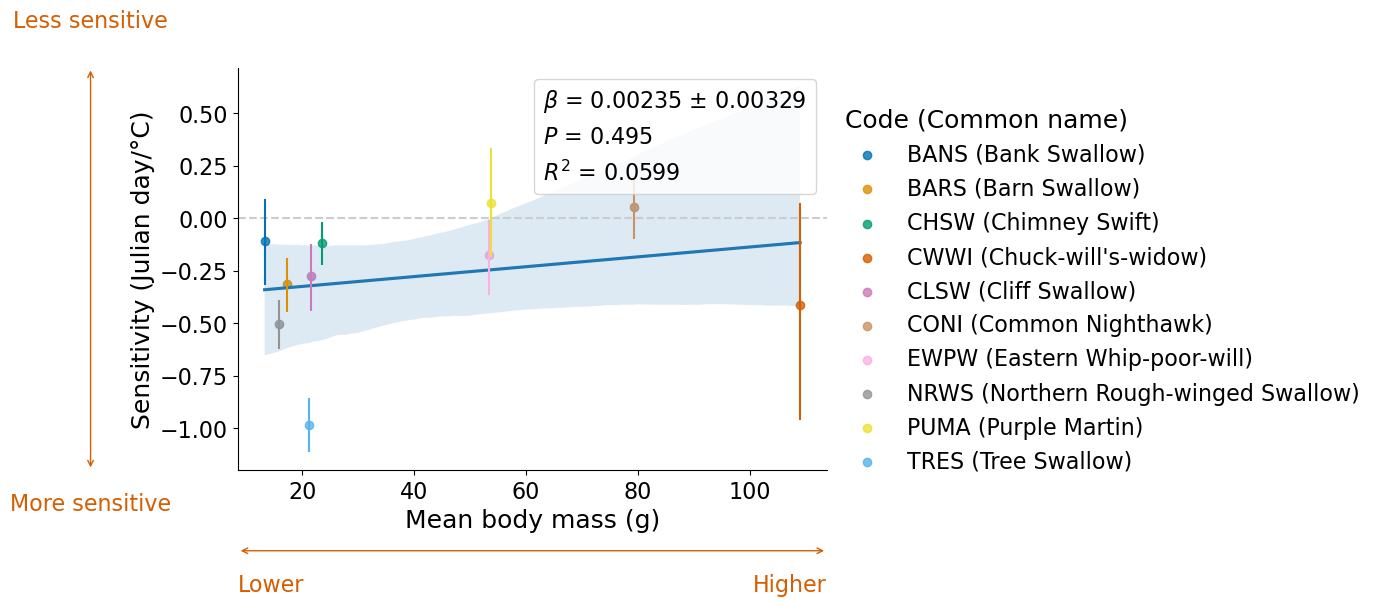

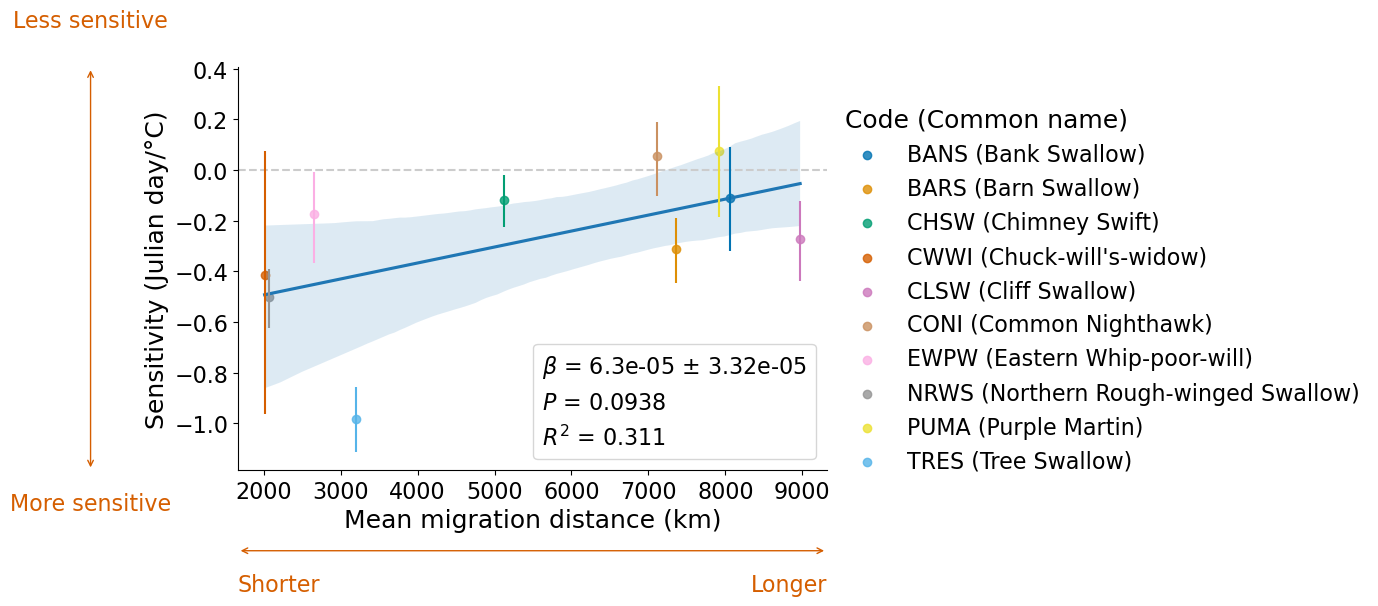

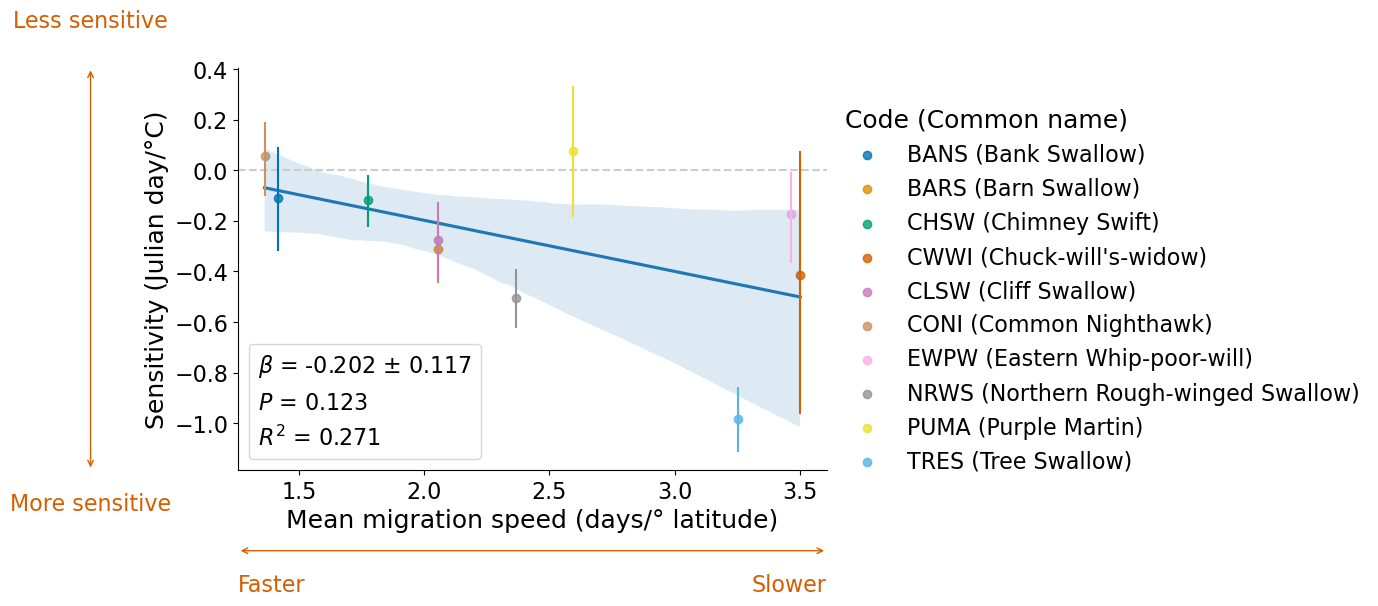

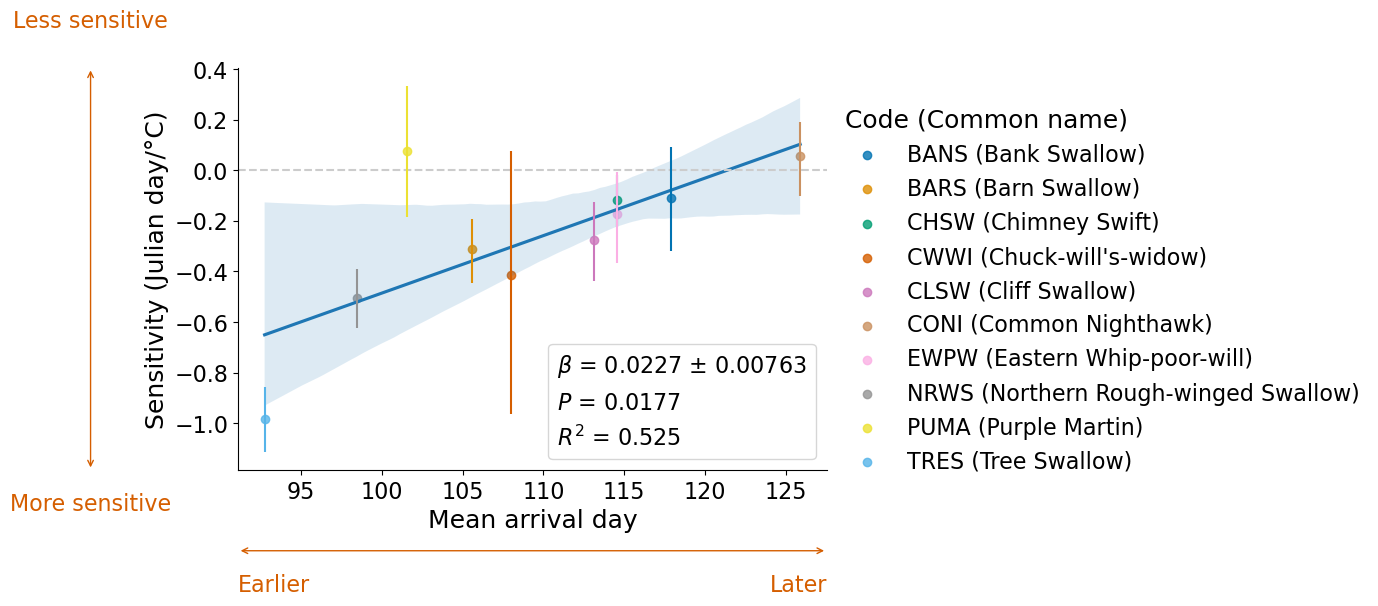

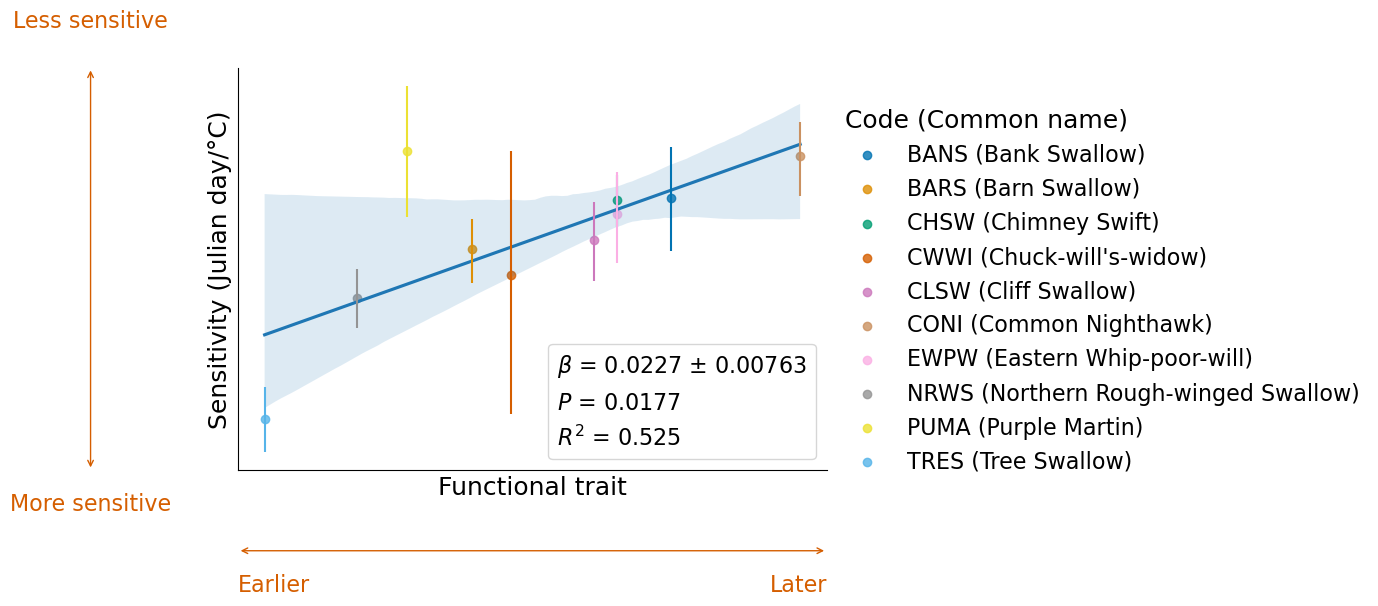

In [79]:
column_name = 'slope'
column_name_lower_conf_int = 'lower_conf_int'
column_name_upper_conf_int = 'upper_conf_int'

model_contribution_traits(df_betas_lmer_traits, column_name, column_name_lower_conf_int, column_name_upper_conf_int)

In [ ]:
# column_name = 'slope_anomalies'
# column_name_lower_conf_int = 'lower_conf_int_anomalies'
# column_name_upper_conf_int = 'upper_conf_int_anomalies'

# model_contribution_traits(df_betas_ols_anomalies_traits, column_name, column_name_lower_conf_int, 
#                           column_name_upper_conf_int)

In [ ]:
df_betas_lmer_traits_sorted = df_betas_lmer_traits.sort_values(by='slope')
print(df_betas_lmer_traits_sorted.shape)

df_betas_lmer_traits_sorted

In [ ]:
df_betas_lmer_traits_sorted['rank'] = range(1, len(df_betas_lmer_traits_sorted) + 1)
print(df_betas_lmer_traits_sorted.shape)

df_betas_lmer_traits_sorted

In [ ]:
df_betas_lmer_traits = df_betas_lmer_traits.merge(df_betas_lmer_traits_sorted[['scientific_name', 'rank']], on='scientific_name')
print(df_betas_lmer_traits.shape)

df_betas_lmer_traits

In [ ]:
df_betas_lmer_traits['demographic_trend'] = [-1.6, -1.8, -2.1, -1.2, -0.6, 0.8, -0.5, -3.7, -0.2, -0.7]
print(df_betas_lmer_traits.shape)

df_betas_lmer_traits

In [ ]:
model_ols = smf.ols(formula='demographic_trend ~ slope', data=df_betas_lmer_traits)

res_ols = model_ols.fit()

print(res_ols.summary())

slope = res_ols.params[1]
print(slope)

standard_error = res_ols.bse.iloc[1]
print(standard_error)

intercept = res_ols.params[0]
print(intercept)

r_squared = res_ols.rsquared
print(r_squared)

p_value = res_ols.pvalues[1]
print(p_value)

sns.regplot(data=df_betas_lmer_traits, x='slope', y='demographic_trend')

In [ ]:
predictor_variable = 'rank'

column_name = 'slope'

column_name_lower_conf_int = 'lower_conf_int'

column_name_upper_conf_int = 'upper_conf_int'

g = sns.lmplot(data=df_betas_lmer_traits, x=predictor_variable, y=column_name, hue='code_common_name', fit_reg=False, 
                palette='colorblind', height=4.76, aspect=1.5) # facet_kws={'legend_out': True}

g.set(xlabel=None)

g._legend.set_title('Code (Common name)')

plt.setp(g._legend.get_title(), fontsize=18)

sns.move_legend(g, 'center right', bbox_to_anchor=(1.2, 0.5), fontsize=16, alignment='left')

g.tick_params(bottom=False, labelbottom=False, labelsize=16)

plt.axhline(y=0, color='0.8', linestyle='--')

plt.errorbar(x=df_betas_lmer_traits[predictor_variable], y=df_betas_lmer_traits[column_name], 
             yerr=[df_betas_lmer_traits[column_name] - df_betas_lmer_traits[column_name_lower_conf_int], 
                   df_betas_lmer_traits[column_name_upper_conf_int] - df_betas_lmer_traits[column_name]], 
             linestyle='', 
             ecolor=sns.color_palette('colorblind').as_hex())

for i, code in enumerate(df_betas_lmer_traits['species_code']):
    plt.annotate(code, (df_betas_lmer_traits['rank'].iloc[i], df_betas_lmer_traits['upper_conf_int'].iloc[i]), 
                 ha='center', fontsize=12)

plt.ylabel('Sensitivity (Julian day/°C)', fontsize=18)

plt.annotate('', xy=(-0.25, 0), xycoords='axes fraction', xytext=(-0.25, 1), 
        arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

plt.annotate('More sensitive', xy=(-0.25, 0), xycoords='axes fraction', xytext=(-0.25, -0.1), 
             ha='left', color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

plt.annotate('Less sensitive', xy=(-0.25, 1), xycoords='axes fraction', xytext=(-0.25, 1.1), ha='left', 
             color=sns.color_palette('colorblind').as_hex()[3], fontsize=16)

print(g.figure.get_size_inches())

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_linear_mixed_models.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
# plt.subplots_adjust(left=0.25, right=0.75, top=1, bottom=0)
# plt.plot([0, 1], [1, 0], linewidth=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Mean')
plt.ylabel('Mean')
print(plt.margins())
plt.show()
# plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/figure1.pdf', bbox_inches='tight')